<a href="https://colab.research.google.com/gist/ShubhZ33/bdf91a27c99dafab7effc777eaa0372d/copy-of-datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Important Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.3.5
numpy version: 1.21.6
seaborn version: 0.11.2


In [ ]:
mall_data = pd.read_csv('/Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


Exploring the data


In [ ]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
85,86,Male,48,54,46
30,31,Male,60,30,4
125,126,Female,31,70,77
185,186,Male,30,99,97
19,20,Female,35,23,98
51,52,Male,33,42,60
181,182,Female,32,97,86
148,149,Female,34,78,22
110,111,Male,65,63,52
172,173,Male,36,87,10


In [ ]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There are 5 columns:

Customer ID - numerical - unique customer number - integer
Gender - categorical - binary (Male/Female)
Age - numerical - integer
Annual Income (k$) - numerical - integer
Spending Score (1-100) - numerical - integer

In [ ]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

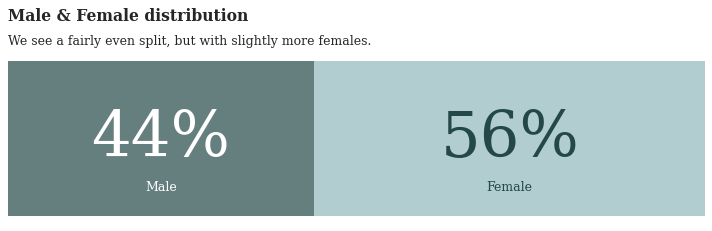

In [ ]:
plot_ratio(df)

Clustering Using hierarchical
 method





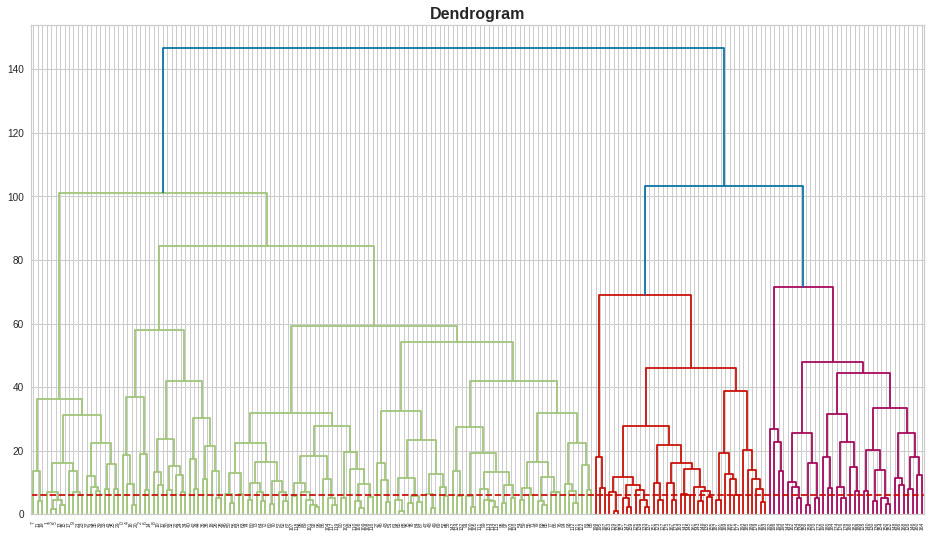

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize = (16, 9))

Z = linkage(X_numerics, method="complete", metric='euclidean')
dendrogram(Z)
plt.axhline(6, ls="--", c = "r")
plt.title('Dendrogram', fontsize = 16, fontweight = 'bold')
plt.show()

Using K-means Clustering


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

Determining number of cluster using elbow method


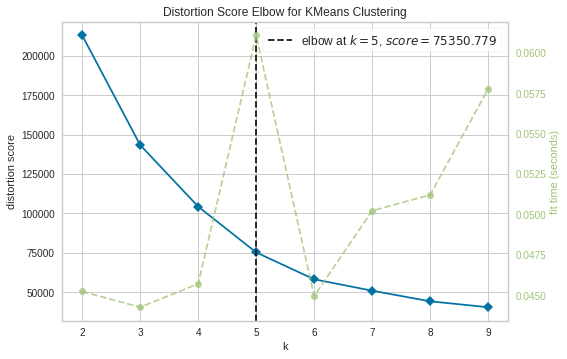

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. However, there is no clear "elbow" visible. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters. Let's see the results.

In [ ]:
import sklearn.cluster as cluster # for training purposes only
import sklearn.metrics as metrics

Validation Using Silhouette method

In [ ]:
# Running various cluster numbers with various random seeds
clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For N_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

In [ ]:
# Turn results in to a pivot table
result = pd.DataFrame(results, columns=["Number of clusters","Random seed","Silhouette_score"])
pivot_km = pd.pivot_table(result, index="Number of clusters", columns="Random seed",values="Silhouette_score")

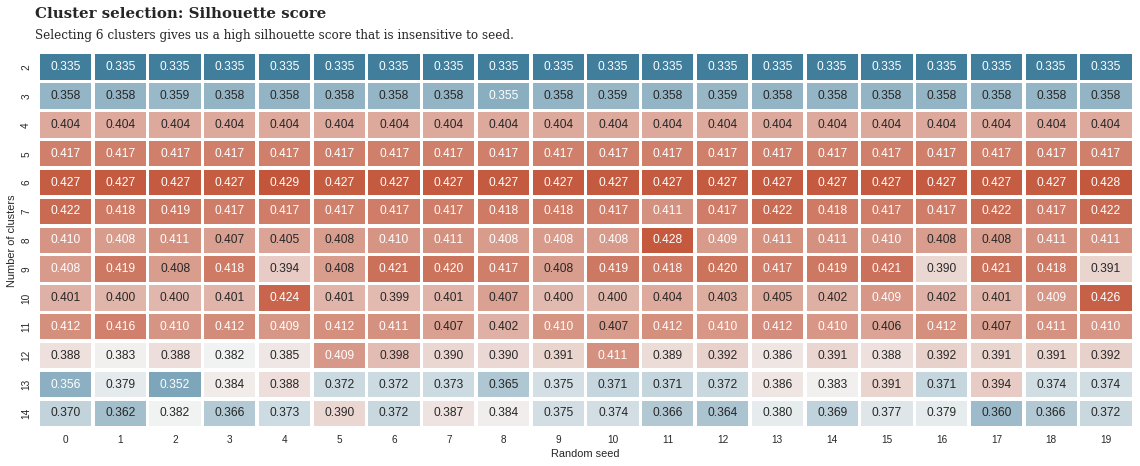

In [ ]:
# Turn that pivot in to a nice visual
fig = plt.figure(figsize=(16, 6))

# Title and sub-title

fig.text(0.035, 1.05, 'Cluster selection: Silhouette score', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.035, 1.001, 'Selecting 6 clusters gives us a high silhouette score that is insensitive to seed.', fontsize=12, fontweight='light', fontfamily='serif')

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(pivot_km, annot=True, linewidths=2.5, fmt='.3f', cmap=cmap,cbar=False)

plt.tight_layout()

Clustering

In [ ]:
# Six looks to be a good number of clusters. We will also assign these clusters to a df
kmeans_sel = KMeans(n_clusters=6, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

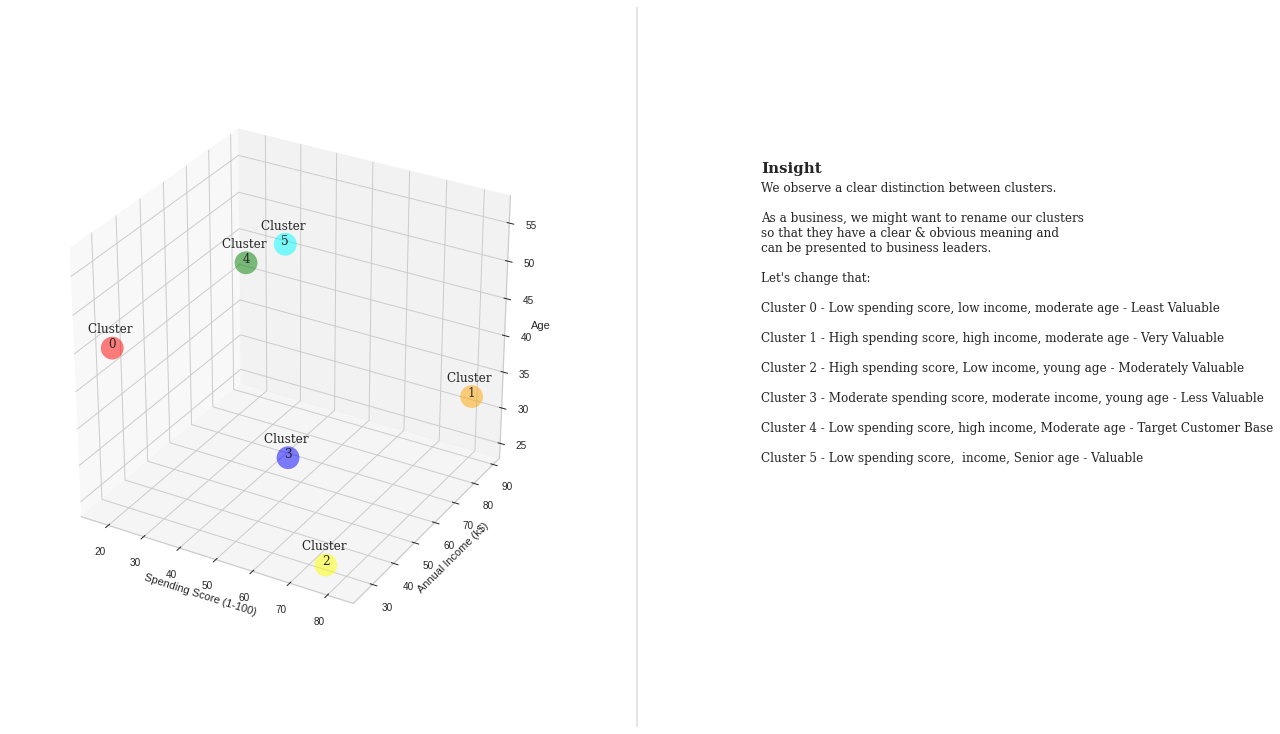

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped_km2["Spending Score (1-100)"], grouped_km2["Annual Income (k$)"], grouped_km2["Age"],color= ['red','orange','yellow','blue','green','cyan'],alpha=0.5,s=500)

# add annotations one by one with a loop
for line in range(0,grouped_km.shape[0]):
     ax.text(grouped_km2['Spending Score (1-100)'][line], grouped_km2['Annual Income (k$)'][line],grouped_km2['Age'][line], s=('Cluster \n'+grouped_km2['Cluster'][line]), horizontalalignment='center', fontsize=12, fontweight='light', fontfamily='serif')
        
ax.set_xlabel("Spending Score (1-100)")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Age")



fig.text(1.172, 0.77, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.172, 0.347, '''
We observe a clear distinction between clusters. 

As a business, we might want to rename our clusters
so that they have a clear & obvious meaning and 
can be presented to business leaders. 

Let's change that:

Cluster 0 - Low spending score, low income, moderate age - Least Valuable

Cluster 1 - High spending score, high income, moderate age - Very Valuable

Cluster 2 - High spending score, Low income, young age - Moderately Valuable

Cluster 3 - Moderate spending score, moderate income, young age - Less Valuable

Cluster 4 - Low spending score, high income, Moderate age - Target Customer Base

Cluster 5 - Low spending score,  income, Senior age - Valuable
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

For n_clusters = 4  and seed = 19 
The average silhouette_score is : 0.42742814991580175


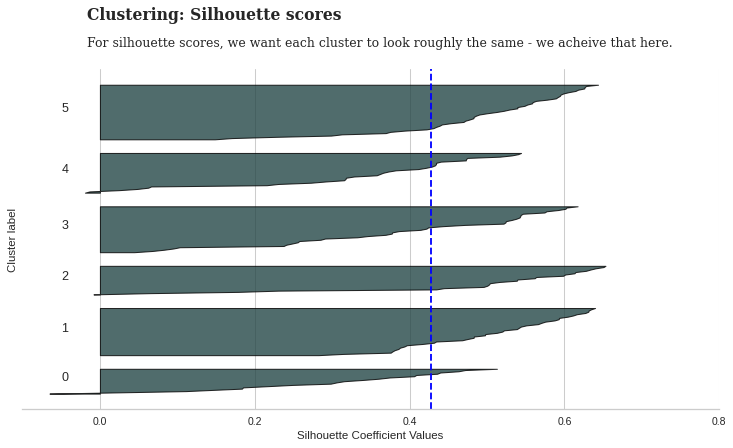

In [ ]:
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=6, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 4," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax = plt.subplots(figsize=(12,6), dpi=75)

y_lower = 10
for i in range(6):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 6)
    ax.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor='#244747', edgecolor="black",linewidth=1, alpha=0.8)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
    
fig.text(0.198, .99, 'Clustering: Silhouette scores', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.198,.93, 'For silhouette scores, we want each cluster to look roughly the same - we acheive that here.', fontsize=12, fontweight='light', fontfamily='serif')
    
ax.get_yaxis().set_ticks([])
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="Blue", linestyle="--")
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
    
plt.show()

In [ ]:
clustered_data

,Spending Score (1-100),Annual Income (k$),Age,Cluster
0,39,15,19,2
1,81,15,21,2
2,6,16,20,0
3,77,16,23,2
4,40,17,31,0
...,...,...,...,...
195,79,120,35,1
196,28,126,45,4
197,74,126,32,1
198,18,137,32,4


In [ ]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Spending Score (1-100),Annual Income (k$),Age
0,0,19.4,26.3,45.5
1,1,82.1,86.5,32.7
2,2,76.9,25.8,25.2
3,3,47.8,57.6,26.7
4,4,17.0,88.9,41.9
5,5,49.1,54.3,56.3


In [ ]:
cluster_only = clustered_data[['Cluster']]

In [ ]:
merge = pd.merge(df, cluster_only, left_index=True, right_index=True)
merge.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range,Gender 1/0,age_band,Cluster
0,1,Male,19,15,39,Young,1,10 ~ 20,2
1,2,Male,21,15,81,Young,1,20 ~ 30,2
2,3,Female,20,16,6,Young,0,20 ~ 30,0
3,4,Female,23,16,77,Adult,0,20 ~ 30,2
4,5,Female,31,17,40,Adult,0,30 ~ 40,0


In [ ]:
# Giving our clusters meaningful names

merge['Cluster_Label'] = merge['Cluster'].apply(lambda x: 'Least Valuable' if x == 0 else 
                                               'Very Valuable' if x == 1 else
                                               'Moderately Valuable' if x == 2 else
                                               'Less Valuable' if x == 3 else
                                               'Target Customer Base' if x == 4 else 'Valuable')

# New column for radar plots a bit later on 

merge['Sex (100=Male)'] = merge['Gender'].apply(lambda x: 100 if x == 'Male' else 0)

In [ ]:
merge['Cluster'] = merge['Cluster'].map(str)
# Order for plotting categorical vars
Cluster_ord = ['0','1','2','3','4','5']
clus_label_order = ['Target Customer Base','Very Valuable','Valuable','Moderately Valuable','Less Valuable','Least Valuable']

In [ ]:
clus_ord = merge['Cluster_Label'].value_counts().index

clu_data = merge['Cluster_Label'].value_counts()[clus_label_order]
##

data_cg = merge.groupby('Cluster_Label')['Gender'].value_counts().unstack().loc[clus_label_order]
data_cg['sum'] = data_cg.sum(axis=1)

##
data_cg_ratio = (data_cg.T / data_cg['sum']).T[['Male', 'Female']][::-1]

Exploring our Clusters

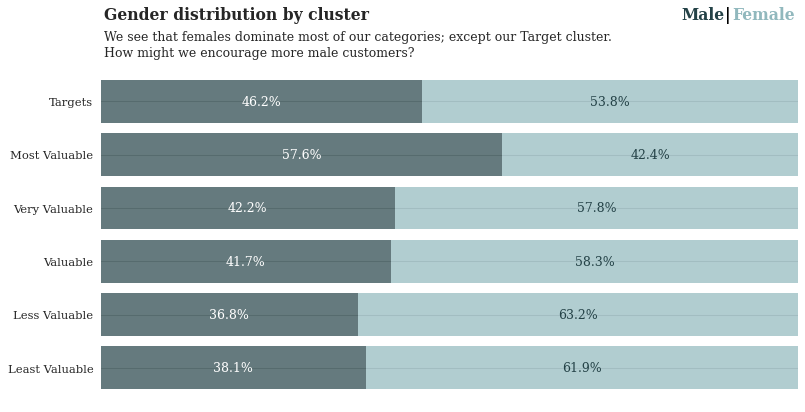

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12, 6), dpi=75)

ax.barh(data_cg_ratio.index, data_cg_ratio['Male'], 
        color='#244247', alpha=0.7, label='Male')
ax.barh(data_cg_ratio.index, data_cg_ratio['Female'], left=data_cg_ratio['Male'], 
        color='#91b8bd', alpha=0.7, label='Female')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels((data_cg_ratio.index), fontfamily='serif', fontsize=11)


# male percentage
for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['Male'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Male'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['Female'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Male'][i]+data_cg_ratio['Female'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='#244247')
    

fig.text(0.129, 0.98, 'Gender distribution by cluster', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.129, 0.9, 
         '''
We see that females dominate most of our categories; except our Target cluster.
How might we encourage more male customers?''' , fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)

fig.text(0.77,0.98,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.819,0.98,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.827,0.98,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')
plt.show()

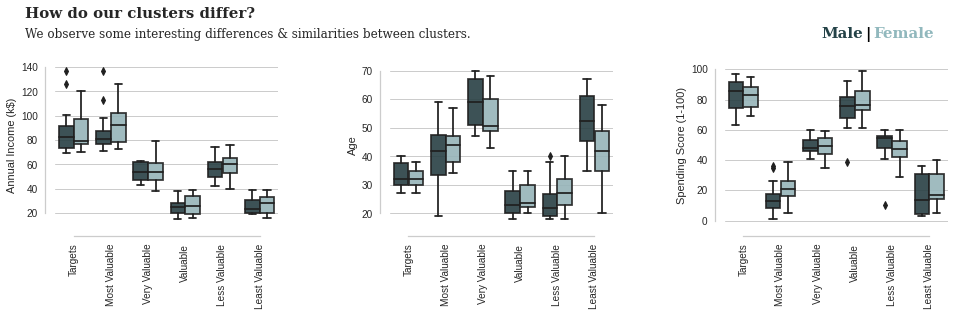

In [ ]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(16, 3))

# Title and sub-title

fig.text(0.099, 1.09, 'How do our clusters differ?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.099, 1, 'We observe some interesting differences & similarities between clusters.', fontsize=12, fontweight='light', fontfamily='serif')

# Grid spec layout

ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.boxplot(x='Cluster_Label',y='Annual Income (k$)',hue='Gender',data=merge,order=['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable'],palette=['#244247','#91b8bd'],boxprops=dict(alpha=.9))
ax1.legend_.remove() 
ax1.set_xlabel('')

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.boxplot(x='Cluster_Label',y='Age',hue='Gender',data=merge,order=['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable'],palette=['#244247','#91b8bd'],boxprops=dict(alpha=.9))
ax2.legend_.remove() 
ax2.set_xlabel('')

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.boxplot(x='Cluster_Label',y='Spending Score (1-100)',hue='Gender',data=merge,order=['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable'],palette=['#244247','#91b8bd'],boxprops=dict(alpha=.9))
ax3.legend_.remove() 
ax3.set_xlabel('')

sns.despine(right=True)
sns.despine(offset=10, trim=True)

ax.legend().set_visible(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)



fig.text(0.79,1,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.828,1,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.835,1,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None) # useful for adjusting space between subplots

In [ ]:
# Radar Plots
clustered_data = merge


clus0 = clustered_data[clustered_data['Cluster_Label'] == 'Least Valuable']
clus1 = clustered_data[clustered_data['Cluster_Label'] == 'Targets']
clus2 = clustered_data[clustered_data['Cluster_Label'] == 'Valuable']
clus3 = clustered_data[clustered_data['Cluster_Label'] == 'Less Valuable']
clus4 = clustered_data[clustered_data['Cluster_Label'] == 'Most Valuable']
clus5 = clustered_data[clustered_data['Cluster_Label'] == 'Very Valuable']

labels=np.array(['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Sex (100=Male)'])
stats0=clus0.loc[:,labels].mean()
stats1=clus1.loc[:,labels].mean()
stats2=clus2.loc[:,labels].mean()
stats3=clus3.loc[:,labels].mean()
stats4=clus4.loc[:,labels].mean()
stats5=clus5.loc[:,labels].mean()


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats0=np.concatenate((stats0,[stats0[0]]))
stats1=np.concatenate((stats1,[stats1[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))
stats3=np.concatenate((stats3,[stats3[0]]))
stats4=np.concatenate((stats4,[stats4[0]]))
stats5=np.concatenate((stats5,[stats5[0]]))


angles=np.concatenate((angles,[angles[0]]))

In [ ]:
df = clustered_data[['Cluster_Label','Age','Annual Income (k$)','Spending Score (1-100)','Sex (100=Male)']]

df = df.groupby('Cluster_Label')['Cluster_Label','Age','Annual Income (k$)','Spending Score (1-100)','Sex (100=Male)'].mean().reset_index()

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black',fontfamily='serif',fontweight='light', size=8)
    #ax.set_xticks([]) # turn labels off if you want - can look quite nice

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30,40,50,75,100], ["10","20","30","40","50","75","100"], color="grey", size=4)
    plt.ylim(0,100)

    # Ind1
    values=df.loc[row].drop('Cluster_Label').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=10, fontfamily='serif',fontweight='bold', y=1.2)
    plt.tight_layout()

In [ ]:
my_dpi=96

plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("crest", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Cluster: '+df['Cluster_Label'][row], color='#244747') #change this to my_palette if you want colour to vary by cluster
    

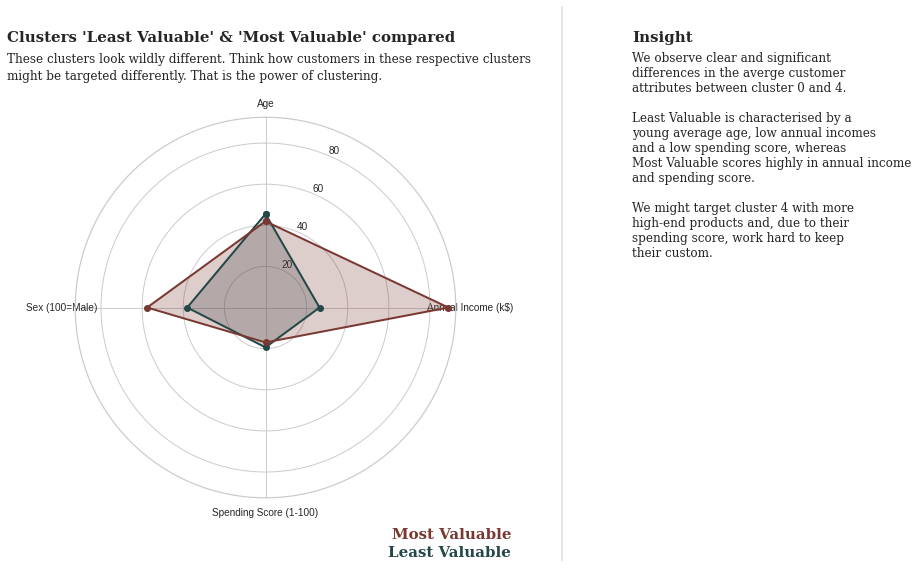

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

ax = plt.subplot(111, polar=True)

ax.plot(angles, stats0, 'o-', linewidth=2, color='#244747', label="Cluster 0")
ax.fill(angles, stats0, color='#244747',alpha=0.25)

ax.plot(angles, stats4, 'o-', linewidth=2,color='#7A3832',label="Cluster 4")
ax.fill(angles, stats4, color='#7A3832',alpha=0.25)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids((angles * 180/np.pi)[0:4],labels)


fig.text(0, 1.03, "Clusters 'Least Valuable' & 'Most Valuable' compared", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0,0.99, 'These clusters look wildly different. Think how customers in these respective clusters', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0,0.955, 'might be targeted differently. That is the power of clustering.', fontsize=12, fontweight='light', fontfamily='serif')


fig.text(1.24, 1.03, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.24, 0.574, '''
We observe clear and significant
differences in the averge customer
attributes between cluster 0 and 4.

Least Valuable is characterised by a
young average age, low annual incomes
and a low spending score, whereas
Most Valuable scores highly in annual income
and spending score.

We might target cluster 4 with more
high-end products and, due to their
spending score, work hard to keep 
their custom.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1.1, 1.1], [0, 1.1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


# Add legend
#plt.legend(loc='upper right',frameon=False, bbox_to_anchor=(1.15, 0.1))
fig.text(1,0.045,"Most Valuable", fontweight="bold", fontfamily='serif', ha='right',fontsize=15, color='#7A3832')
fig.text(1,0.01,"Least Valuable", fontweight="bold", fontfamily='serif',ha='right', fontsize=15, color='#244747')


ax.grid(True)

Heatmap


In [ ]:
clustered_data.to_excel("demooutput.xlsx")